In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

In [3]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [5]:
df_train = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')|(df['condition']=='Cough')|(df['condition']=='Vitamin K Deficiency')|(df['condition']=='Tetaus')|(df['condition']=='Endoscopy or Radiology Premedication')|(df['condition']=='Oral and Dental Conditions')|(df['condition']=='Breast Cancer, Prevention')|(df['condition']=='Leukemia')|(df['condition']=='Head Injury')|(df['condition']=='Premenstrual Syndrome')|(df['condition']=='Anemia')|(df['condition']=='Lactose Intolerance')|(df['condition']=='Malaria')|(df['condition']=='Diaper Rash')|(df['condition']=='Vitamin D Deficiency')|(df['condition']=='Gas')|(df['condition']=='Diabetic Kidney Disease')|(df['condition']=='Bone infection')|(df['condition']=='Labor Pain')|(df['condition']=='Cyclic Vomiting Syndrome')|(df['condition']=='Eye Redness/Itching')|(df['condition']=='Iron Deficiency Anemia')|(df['condition']=='Indigestion')|(df['condition']=='Heart Attack')|(df['condition']=='Conjunctivitis, Allergic')|(df['condition']=='Vitamin/Mineral Supplementation during Pregnancy/Lactation')|(df['condition']=='Dry Skin')|(df['condition']=='Muscle Pain')|(df['condition']=='Urinary Tract Stones')|(df['condition']=='Diarrhea')|(df['condition']=='Cold Symptoms')|(df['condition']=="Parkinson's Disease")|(df['condition']=='Diabetes, Type 1')|(df['condition']=='Allergies')|(df['condition']=='Asthma')|(df['condition']=='Bladder Infection')|(df['condition']=='Headache')|(df['condition']=='Back Pain')|(df['condition']=='Cough')|(df['condition']=='Muscle Spasm')|(df['condition']=='Anxiety')|(df['condition']=='Anxiety and Stress')|(df['condition']=='Panic Disorde')|(df['condition']=='High Cholesterol')|(df['condition']=='Constipation')|(df['condition']=='Motion Sickness')|(df['condition']=='Breast Cance')|(df['condition']=='Period Pain')]


In [6]:
df.shape


(161297, 7)

In [7]:
df_train.shape

(31163, 7)

In [8]:
df_train.condition.value_counts()

Depression                                                    9069
Anxiety                                                       5904
Diabetes, Type 2                                              2554
High Blood Pressure                                           2321
Anxiety and Stress                                            1663
Constipation                                                  1595
Panic Disorde                                                 1463
Muscle Spasm                                                  1244
Cough                                                          927
Back Pain                                                      616
High Cholesterol                                               611
Headache                                                       473
Bladder Infection                                              395
Breast Cance                                                   272
Asthma                                                        

In [9]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [10]:
X.condition.value_counts()

Depression                                                    9069
Anxiety                                                       5904
Diabetes, Type 2                                              2554
High Blood Pressure                                           2321
Anxiety and Stress                                            1663
Constipation                                                  1595
Panic Disorde                                                 1463
Muscle Spasm                                                  1244
Cough                                                          927
Back Pain                                                      616
High Cholesterol                                               611
Headache                                                       473
Bladder Infection                                              395
Breast Cance                                                   272
Asthma                                                        

In [11]:
X.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
13,Cough,"""Have a little bit of a lingering cough from a..."
28,Panic Disorde,"""Honestly, I have been taking ativan for 2 yea..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
36,Constipation,"""SO MUCH PAIN! \r\nIn the last 2 years I have ..."


In [12]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]
X_vitK=X[(X['condition']=='Vitamin K Deficiency')]
X_endo=X[(X['condition']=='Endoscopy or Radiology Premedication')]
X_oral=X[(X['condition']=='Oral and Dental Conditions')]
X_breap=X[(X['condition']=='Breast Cancer, Prevention')]
X_head=X[(X['condition']=='Head Injury')]
X_lu=X[(X['condition']=='Leukemia')]
X_menst=X[(X['condition']=='Premenstrual Syndrome')]
X_lact=X[(X['condition']=='Lactose Intolerance')]
X_ana=X[(X['condition']=='Anemia')]
X_dia=X[(X['condition']=='Diaper Rash')]
X_vitD=X[(X['condition']=='Vitamin D Deficiency')]
X_malr=X[(X['condition']=='Malaria')]
X_gas=X[(X['condition']=='Gas')]
X_diabkd=X[(X['condition']=='Diabetic Kidney Disease')]
X_Bone=X[(X['condition']=='Bone infection')]
X_lab=X[(X['condition']=='Labor pain')]
X_cycl=X[(X['condition']=='Cyclic Vomiting Syndrome')]
X_iron=X[(X['condition']=='Iron Deficiency Anemia')]
X_eye=X[(X['condition']=='Eye Redness/Itching')]
X_ind=X[(X['condition']=='Indigestion')]


Text(0.5, 1.0, 'Word cloud for Gas')

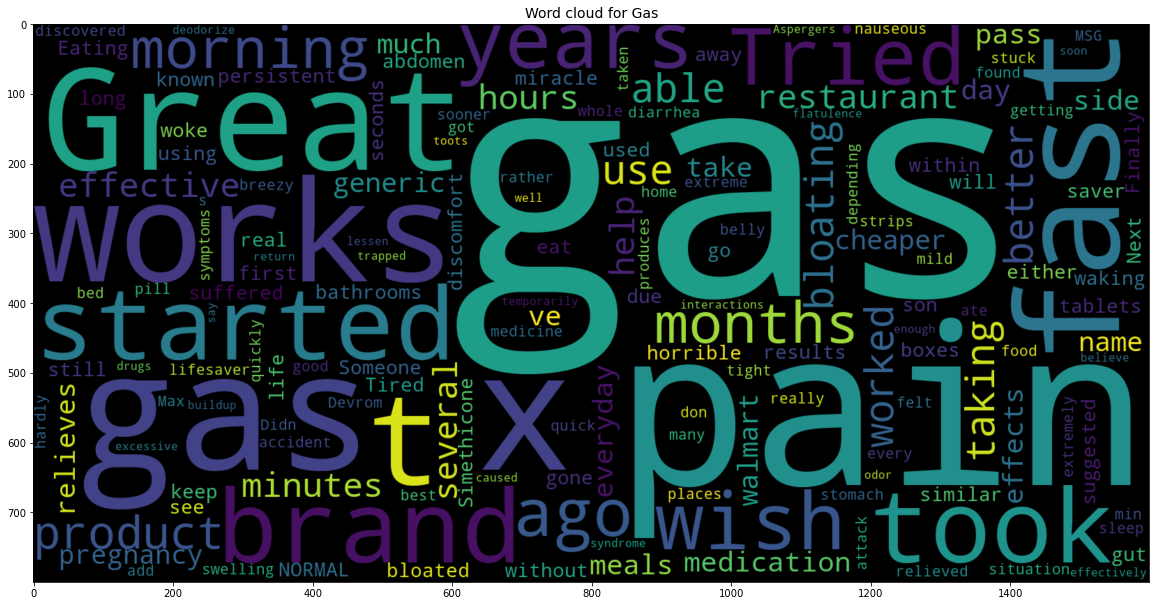

In [13]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_gas.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Gas',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Vitamin D defeiciency')

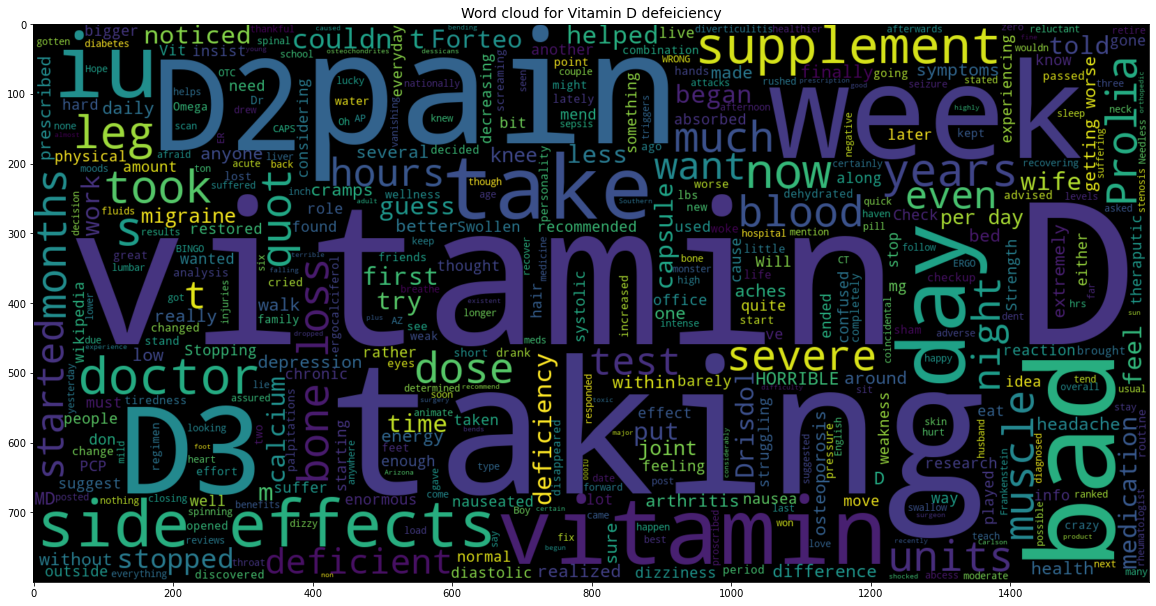

In [14]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_vitD.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Vitamin D defeiciency',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Malaria')

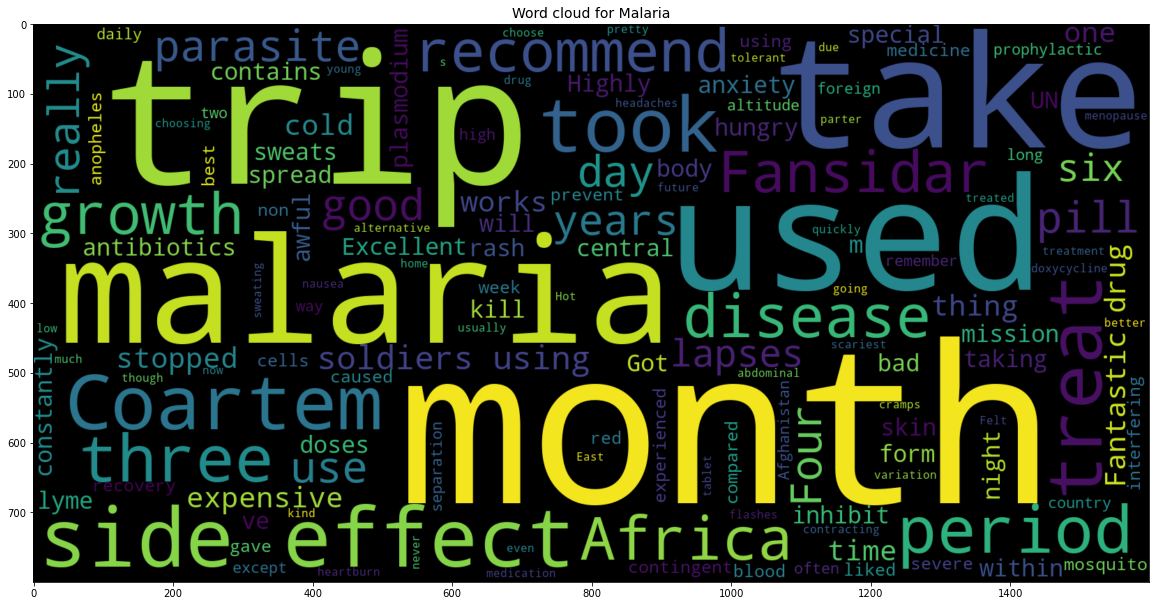

In [15]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_malr.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Malaria',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Lactose IntolerNCE')

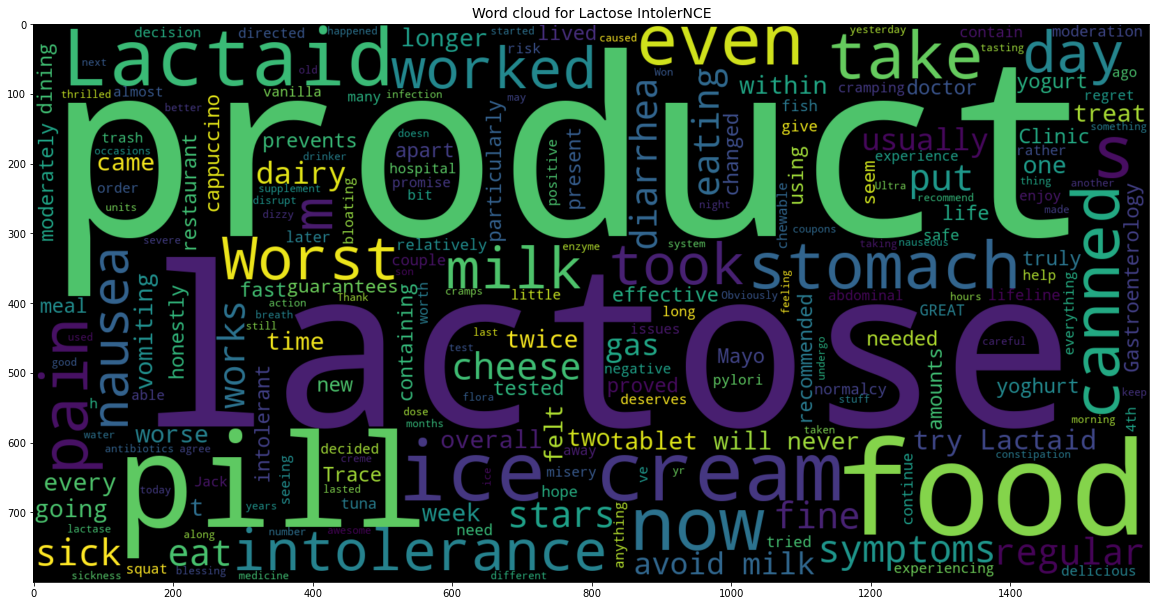

In [16]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_lact.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Lactose IntolerNCE',fontsize=14)

In [17]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [18]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [19]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\Ansh\AppData\Local\Temp\ipykernel_7804\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [20]:
X.head()

,condition,review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
13,Cough,"Have a little bit of a lingering cough from a cold. Not giving me much trouble except keeps me up at night. I heard this was good so I took so I could get some sleep. Helped tremendously with the cough but then I was having bad stomach cramps and diarrhea. I hadn&#039;t eaten anything that should have upset my stomach and it didn&#039;t really feel like a &quot;bug&quot; so I looked up side effects for Delsym. Now I wish I had done that first because I probably wouldn&#039;t have taken it. So, while it worked for my cough I still didn&#039;t get any sleep due to the stomach issues."
28,Panic Disorde,"Honestly, I have been taking ativan for 2 years now 1mg twice daily. It does help but it should be used as a tool for panic attacks NOT A SOLUTION. I have tried so many anti-depressants as well such as cymbalta, cipralex and a couple more. The best thing is to talk to close friends and family or even a psychiatrist. talking to people and venting is honestly the best thing you can do for yourself even though it takes a lot of will power to do it. I would love to hear other people opinion."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
36,Constipation,SO MUCH PAIN! \r\nIn the last 2 years I have suffered with a brain tumour so have been in a LOT of pain to the point of morphine everyday for a year. Then I had brain surgery...but the pain from this pill came pretty close!! In serious pain to the point of blacking out hot and cold shivers and just sat in pain feeling like trapped wind/indigestion it&#039;s just.. Ahhhh!!!! Don&#039;t take this!!!


In [21]:
from nltk.corpus import stopwords

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop = stopwords.words('english')

In [24]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [26]:
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [27]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [31]:
from bs4 import BeautifulSoup
import re

In [32]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [33]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\Ansh\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [34]:
X.head()


,condition,review,review_clean
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
13,Cough,"Have a little bit of a lingering cough from a cold. Not giving me much trouble except keeps me up at night. I heard this was good so I took so I could get some sleep. Helped tremendously with the cough but then I was having bad stomach cramps and diarrhea. I hadn&#039;t eaten anything that should have upset my stomach and it didn&#039;t really feel like a &quot;bug&quot; so I looked up side effects for Delsym. Now I wish I had done that first because I probably wouldn&#039;t have taken it. So, while it worked for my cough I still didn&#039;t get any sleep due to the stomach issues.",little bit lingering cough cold giving much trouble except keep night heard good took could get sleep helped tremendously cough bad stomach cramp diarrhea eaten anything upset stomach really feel like bug looked side effect delsym wish done first probably taken worked cough still get sleep due stomach issue
28,Panic Disorde,"Honestly, I have been taking ativan for 2 years now 1mg twice daily. It does help but it should be used as a tool for panic attacks NOT A SOLUTION. I have tried so many anti-depressants as well such as cymbalta, cipralex and a couple more. The best thing is to talk to close friends and family or even a psychiatrist. talking to people and venting is honestly the best thing you can do for yourself even though it takes a lot of will power to do it. I would love to hear other people opinion.",honestly taking ativan year mg twice daily help used tool panic attack solution tried many anti depressant well cymbalta cipralex couple best thing talk close friend family even psychiatrist talking people venting honestly best thing even though take lot power would love hear people opinion
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
36,Constipation,SO MUCH PAIN! \r\nIn the last 2 years I have suffered with a brain tumour so have been in a LOT of pain to the point of morphine everyday for a year. Then I had brain surgery...but the pain from this pill came pretty close!! In serious pain to the point of blacking out hot and cold shivers and just sat in pain feeling like trapped wind/indigestion it&#039;s just.. Ahhhh!!!! Don&#039;t take this!!!,much pain last year suffered brain tumour lot pain point morphine everyday year brain surgery pain pill came pretty close serious pain point blacking hot cold shiver sat pain feeling like trapped wind indigestion ahhhh take


## Feature and Target variable

In [35]:
X_feat=X['review_clean']
y=X['condition']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=202)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [39]:
count_train


<24930x16784 sparse matrix of type '<class 'numpy.int64'>'
	with 705847 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes


accuracy:   0.703
Confusion matrix, without normalization


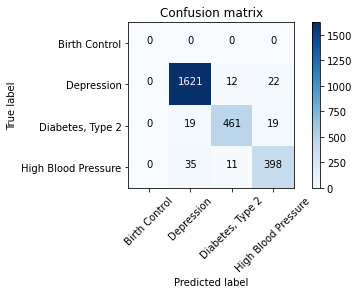

In [40]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [41]:
#['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Pain','Anxiety','Anxiety and Stress','Panic Disorde','Constipation','Muscle Spasm','Cough','Back Pain','High Cholesterol','Headache','Bladder Infection','Breast Cance','Asthma','Motion Sickness','Allergies','Diabetes, Type 1','Period Pain',"Parkinson's Disease",'Cold Symptoms','Diarrhea','Urinary Tract Stones','Muscle Pain','Dry Skin','Vitamin/Mineral Supplementation during Pregnancy/Lactation','Conjunctivitis, Allergic','Heart Attack','Indigestion','Eye Redness/Itching','Iron Deficiency Anemia','Cyclic Vomiting Syndrome','Labor Pain','Bone infection','Vitamin K Deficiency','Endoscopy or Radiology Premedication','Oral and Dental Conditions','Breast Cancer, Prevention','Head Injury','Leukemia','Premenstrual Syndrome','Lactose Intolerance','Anemia','Diaper Rash','Vitamin D Deficiency','Malaria','Gas'])

accuracy:   0.771
Confusion matrix, without normalization


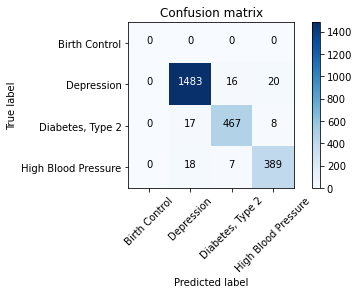

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy:   0.798
Confusion matrix, without normalization


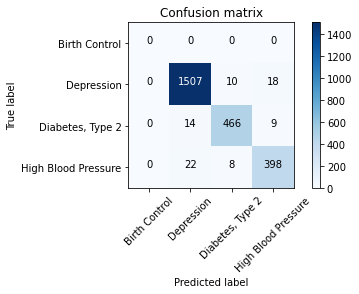

In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Sample Predictions


In [45]:
X.tail()

,condition,review,review_clean
161284,Panic Disorde,"Had panic attacks and social anxiety starting in adolescence. Powered through until postpartum depression after my second child and began having severe mood swings, irritability and panic attacks (dizzy spells, heart racing, fainting, chest pain) even when I wasn&#039;t feeling stress. Started Effexor on 37.5mg and had almost immediate success (within a week). Felt a little hyper and would feel like I was getting a low jolt of electricity through my legs, but otherwise fine. Gained a bit of weight but I think that&#039;s only because I was finally able to eat without stomach pain. Increased to 70mg after two months when panic attacks began again, love this drug! Finally have a normal life.",panic attack social anxiety starting adolescence powered postpartum depression second child began severe mood swing irritability panic attack dizzy spell heart racing fainting chest pain even feeling stress started effexor mg almost immediate success within week felt little hyper would feel like getting low jolt electricity leg otherwise fine gained bit weight think finally able eat without stomach pain increased mg two month panic attack began love drug finally normal life
161285,"Conjunctivitis, Allergic",Used this a month ago for allergic conjunctivitis. Thought it worked. Have allergic conjunctivitis again. Used this product and like others my eyes are swollen and blood red. Hope to see Allergist tomorrow for help.,used month ago allergic conjunctivitis thought worked allergic conjunctivitis used product like others eye swollen blood red hope see allergist tomorrow help
161286,Depression,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap
161287,Anxiety,"I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1.",super taking medication started dealing anxiety depression awhile got prescribed ativan month ago never took thought could handle relationship started fail thinking went back doctor decided try prescribed time day took full one night bad panic attack within minute calm slept entire night taking half morning mid afternoon full night make feel tired brain slight fog nothing crazy still know whats going though give try suffering know
161290,High Blood Pressure,"I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation


In [46]:
text =["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects"]
test = tfidf_vectorizer.transform(text)
pred1=passive.predict(test)[0]
pred1

'Depression'

In [47]:
text1 =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test1 = tfidf_vectorizer.transform(text1)
pred1=passive.predict(test1)[0]
pred1

'High Blood Pressure'

In [48]:
text2 =['i m not able to digest milk properly']
test2 = tfidf_vectorizer.transform(text2)
pred1=passive.predict(test2)[0]
pred1

'Lactose Intolerance'

In [49]:
text3 =['having pain in my spinal cord and muscle']
test2 = tfidf_vectorizer.transform(text3)
pred1=passive.predict(test2)
pred1

array(['Muscle Spasm'], dtype='<U58')

In [62]:
text2 =['severe headache and nasuea']
test2 = tfidf_vectorizer.transform(text2)
pred1=passive.predict(test2)[0]
pred1

'High Blood Pressure'

In [51]:
text2 =['heart is heavy']
test2 = tfidf_vectorizer.transform(text2)
pred1=passive.predict(test2)[0]
pred1

'High Blood Pressure'

In [53]:
text2 =['I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1.']
test2 = tfidf_vectorizer.transform(text2)
pred1=passive.predict(test2)[0]
pred1

'Anxiety'

In [67]:
def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [75]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer.transform(lst_text)
    prediction = passive.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [69]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [72]:
tfidf_trigram = tfidf_vectorizer.transform(sentences)


predictions = passive.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losi

In [76]:
df_testsent = predict_text(sentences)
df_testsent

,test_sent,prediction
0,tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation,High Blood Pressure
1,third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap,Depression
2,got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine,"Diabetes, Type 2"


In [77]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidfvectorizer.pkl')
joblib.dump(passive, 'passmodel.pkl')

['passmodel.pkl']

In [78]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'